<a href="https://colab.research.google.com/github/R1ng1/Deep_Learning_Lab-/blob/main/Deep_Learning_Lab_5_24040208004.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from torchvision import datasets
data_path = '../data-unversioned/p1ch7/'
cifar10 = datasets.CIFAR10(data_path, train=True, download=True)
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True)

100%|██████████| 170M/170M [00:06<00:00, 27.8MB/s]


In [ ]:
 type(cifar10).__mro__

(torchvision.datasets.cifar.CIFAR10,
 torchvision.datasets.vision.VisionDataset,
 torch.utils.data.dataset.Dataset,
 typing.Generic,
 object)

In [ ]:
 len(cifar10)

50000

In [ ]:
img, label = cifar10[99]
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
img, label, class_names[label]

(<PIL.Image.Image image mode=RGB size=32x32>, 1, 'automobile')

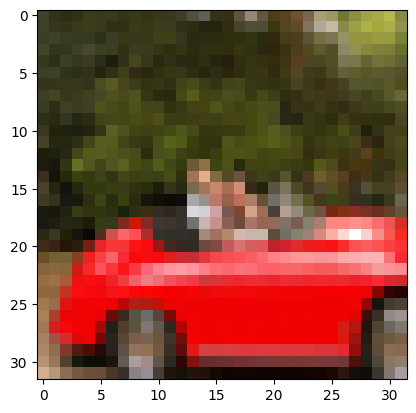

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()

In [ ]:
 from torchvision import transforms
 dir(transforms)

['AugMix',
 'AutoAugment',
 'AutoAugmentPolicy',
 'CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'ElasticTransform',
 'FiveCrop',
 'GaussianBlur',
 'Grayscale',
 'InterpolationMode',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandAugment',
 'RandomAdjustSharpness',
 'RandomAffine',
 'RandomApply',
 'RandomAutocontrast',
 'RandomChoice',
 'RandomCrop',
 'RandomEqualize',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomInvert',
 'RandomOrder',
 'RandomPerspective',
 'RandomPosterize',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSolarize',
 'RandomVerticalFlip',
 'Resize',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 'TrivialAugmentWide',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional_pil',
 '_functional_tensor',
 '_presets',
 'autoaugment',
 'functional',
 'transforms']

In [ ]:
 from torchvision import transforms
to_tensor = transforms.ToTensor()
 img_t = to_tensor(img)
 img_t.shape

torch.Size([3, 32, 32])

In [ ]:
tensor_cifar10 = datasets.CIFAR10(data_path, train=True, download=False,
 transform=transforms.ToTensor())

In [ ]:
img_t, _ = tensor_cifar10[99]
type(img_t)

torch.Tensor

In [ ]:
img_t.shape, img_t.dtype

(torch.Size([3, 32, 32]), torch.float32)

In [ ]:
 img_t.min(), img_t.max()

(tensor(0.), tensor(1.))

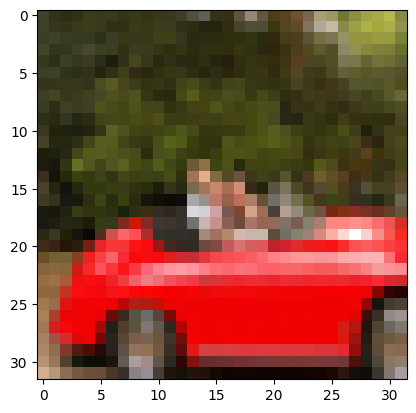

In [ ]:
 plt.imshow(img_t.permute(1, 2, 0))
 plt.show()

## Normalizing data

In [ ]:
import torch
imgs = torch.stack([img_t for img_t, _ in tensor_cifar10], dim=3)
imgs.shape

torch.Size([3, 32, 32, 50000])

In [ ]:
 imgs.view(3,-1).mean(dim=1)

tensor([0.4914, 0.4822, 0.4465])

In [ ]:
 imgs.view(3,-1).std(dim=1)


tensor([0.2470, 0.2435, 0.2616])

In [ ]:
 transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616))

Normalize(mean=(0.4915, 0.4823, 0.4468), std=(0.247, 0.2435, 0.2616))

In [ ]:
transformed_cifar10 = datasets.CIFAR10(
 data_path, train=True, download=False,
 transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4915, 0.4823, 0.4468),
                        (0.2470, 0.2435, 0.2616))
 ]))

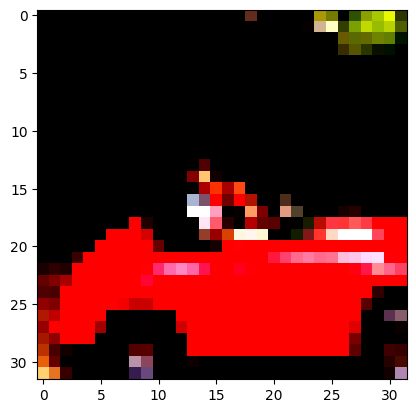

In [ ]:
 img_t, _ = transformed_cifar10[99]
 plt.imshow(img_t.permute(1, 2, 0))
 plt.show()

## Distinguishing birds from airplanes

In [ ]:
 label_map = {0: 0, 2: 1}
 class_names = ['airplane', 'bird']
 cifar2 = [(img, label_map[label])
 for img, label in cifar10
 if label in [0, 2]]
 cifar2_val = [(img, label_map[label])
 for img, label in cifar10_val
 if label in [0, 2]]

In [ ]:
 import torch.nn as nn

 n_out = 2
 model = nn.Sequential(
             nn.Linear(
                 3072,
                 512,
                 ),
            nn.Tanh(),
            nn.Linear(
                512,
                n_out,
                )
            )


## Representing the output as probabilities

In [ ]:
def softmax(x):
 return torch.exp(x) / torch.exp(x).sum()

In [ ]:
x = torch.tensor([1.0, 2.0, 3.0])

softmax(x)

tensor([0.0900, 0.2447, 0.6652])

In [ ]:
 softmax(x).sum()

tensor(1.)

In [ ]:
 softmax = nn.Softmax(dim=1)
 x = torch.tensor([[1.0, 2.0, 3.0],
                  [1.0, 2.0, 3.0]])
 softmax(x)

tensor([[0.0900, 0.2447, 0.6652],
        [0.0900, 0.2447, 0.6652]])

In [ ]:
model = nn.Sequential(
 nn.Linear(3072, 512),
 nn.Tanh(),
 nn.Linear(512, 2),
 nn.Softmax(dim=1))

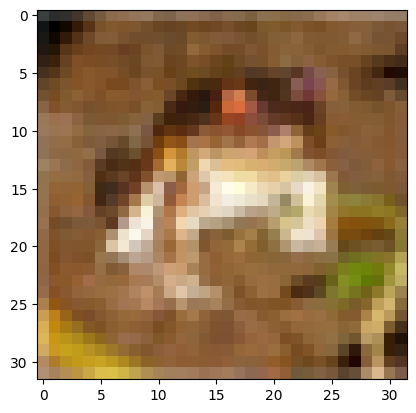

In [ ]:
img_t, _ = tensor_cifar10[0] # Get an image from tensor_cifar10 which contains tensors
plt.imshow(img_t.permute(1, 2, 0))
plt.show()

In [ ]:
img_batch = img_t.view(-1).unsqueeze(0)

In [ ]:
out = model(img_batch)
out

tensor([[0.5011, 0.4989]], grad_fn=<SoftmaxBackward0>)

In [ ]:
 _, index = torch.max(out, dim=1)

 index

tensor([0])

##  A loss for classifying

In [ ]:
 model = nn.Sequential(
 nn.Linear(3072, 512),
 nn.Tanh(),
 nn.Linear(512, 2),
 nn.LogSoftmax(dim=1))

In [ ]:
 loss = nn.NLLLoss()

In [ ]:
img_t, label = transformed_cifar10[0]
out = model(img_t.view(-1).unsqueeze(0))
loss(out, torch.tensor([label]))

IndexError: Target 6 is out of bounds.

##  Training the classifier

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim # Import torch.optim

model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512, 2),
    nn.LogSoftmax(dim=1)
)

learning_rate = 1e-2
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.NLLLoss() # Rename loss to loss_fn to avoid conflict with loss variable inside the loop

n_epochs = 5
for epoch in range(n_epochs):
    for img, label in transformed_cifar2: # Use the transformed_cifar2 dataset
        out = model(img.view(-1).unsqueeze(0))
        loss = loss_fn(out, torch.tensor([label])) # Use loss_fn and the correct label
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 2.756318
Epoch: 1, Loss: 6.961388
Epoch: 2, Loss: 6.442205
Epoch: 3, Loss: 2.613232
Epoch: 4, Loss: 5.000542


In [ ]:
 train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
 shuffle=True)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Use the transformed_cifar2 dataset which contains tensors
train_loader = torch.utils.data.DataLoader(transformed_cifar2, batch_size=64,
                                           shuffle=True)
model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512, 2),
    nn.LogSoftmax(dim=1)
)
learning_rate = 1e-2
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.NLLLoss()
n_epochs = 100

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size,-1))
        loss = loss_fn(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.471550
Epoch: 1, Loss: 0.396580
Epoch: 2, Loss: 0.445779
Epoch: 3, Loss: 0.321041
Epoch: 4, Loss: 0.194366
Epoch: 5, Loss: 0.744688
Epoch: 6, Loss: 0.396749
Epoch: 7, Loss: 0.405005
Epoch: 8, Loss: 0.663167
Epoch: 9, Loss: 0.777275
Epoch: 10, Loss: 0.391202
Epoch: 11, Loss: 0.269902
Epoch: 12, Loss: 0.502617
Epoch: 13, Loss: 0.590541
Epoch: 14, Loss: 0.108774
Epoch: 15, Loss: 0.340189
Epoch: 16, Loss: 0.258956
Epoch: 17, Loss: 0.180751
Epoch: 18, Loss: 0.324080
Epoch: 19, Loss: 0.269492
Epoch: 20, Loss: 0.169193
Epoch: 21, Loss: 0.485858
Epoch: 22, Loss: 0.289256
Epoch: 23, Loss: 0.199922
Epoch: 24, Loss: 0.194028
Epoch: 25, Loss: 0.306319
Epoch: 26, Loss: 0.057253
Epoch: 27, Loss: 0.249771
Epoch: 28, Loss: 0.228623
Epoch: 29, Loss: 0.250708
Epoch: 30, Loss: 0.210199
Epoch: 31, Loss: 0.152860
Epoch: 32, Loss: 0.284042
Epoch: 33, Loss: 0.394033
Epoch: 34, Loss: 0.233707
Epoch: 35, Loss: 0.086918
Epoch: 36, Loss: 0.087130
Epoch: 37, Loss: 0.241686
Epoch: 38, Loss: 0.300

In [ ]:
val_loader = torch.utils.data.DataLoader(transformed_cifar2_val, batch_size=64,
                                         shuffle=False)
correct = 0
total = 0
with torch.no_grad():
    for imgs, labels in val_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size,-1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())

print("Accuracy: %f" % (correct / total))

Accuracy: 0.818500


In [ ]:
 model = nn.Sequential(
 nn.Linear(3072, 1024),
 nn.Tanh(),
 nn.Linear(1024, 512),
 nn.Tanh(),
 nn.Linear(512, 128),
 nn.Tanh(),
 nn.Linear(128, 2),
 nn.LogSoftmax(dim=1))

In [ ]:
 model = nn.Sequential(
 nn.Linear(3072, 1024),
 nn.Tanh(),
 nn.Linear(1024, 512),
 nn.Tanh(),
 nn.Linear(512, 128),
 nn.Tanh(),
 nn.Linear(128, 2))
 loss_fn = nn.CrossEntropyLoss()

In [ ]:
numel_list = [p.numel()
 for p in model.parameters()
 if p.requires_grad == True]
sum(numel_list), numel_list

(3737474, [3145728, 1024, 524288, 512, 65536, 128, 256, 2])

In [ ]:
numel_list = [p.numel() for p in model.parameters()]
sum(numel_list), numel_list

(3737474, [3145728, 1024, 524288, 512, 65536, 128, 256, 2])

In [ ]:
linear = nn.Linear(3072, 1024)
linear.weight.shape, linear.bias.shape

(torch.Size([1024, 3072]), torch.Size([1024]))